## Programming Exercise 3 - Multi-class Classification and Neural Networks

In [96]:
# %load ../../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# load MATLAB files
from scipy.io import loadmat
from scipy.optimize import minimize

from sklearn.linear_model import LogisticRegression

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

In [97]:
data = loadmat('data/ex3data1.mat')
data.keys() # data is a matlab data directory, contains X and y and some descriptions 

['y', 'X', '__version__', '__header__', '__globals__']

In [98]:
weights = loadmat('data/ex3weights.mat')
weights.keys() # load all thetas for neural networks model 

['Theta2', '__version__', '__header__', 'Theta1', '__globals__']

In [99]:
y = data['y']
X = np.c_[np.ones((data['X'].shape[0],1)),data['X']]
print('X: {} (with intercept)'.format(X.shape))
print('y: {}'.format(y.shape))

X: (5000, 401) (with intercept)
y: (5000, 1)


theta1:(25, 401)
theta2:(10, 26)


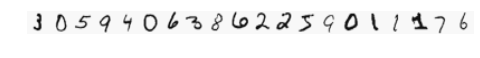

In [100]:
theta1, theta2 = weights['Theta1'],weights['Theta2']
print('theta1:{}'.format(theta1.shape))
print('theta2:{}'.format(theta2.shape))

sample = np.random.choice(X.shape[0],20)     #get dandom 20 samples from X 
plt.imshow(X[sample,1:].reshape(-1,20).T)
plt.axis('off');

## Multiclass Classification

In [101]:
##### define functions ######
def sigmoid(z):
    return(1/(1+np.exp(-z)))

# regulized cost function 
def lrcostFunctionReg(theta,reg,X,y):
    m = float(y.size)
    h = sigmoid(X.dot(theta.reshape(-1,1)))
    
    J = (-1)*(1/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y)) + (reg/(2*m))*np.sum(np.square(theta[1:]))
    
    if np.isnan(J[0]):
        return(np.inf)
    return(J[0])

# regulized gradient function  
def lrgradientReg(theta,reg,X,y):
    m = float(y.size)
    h = sigmoid(X.dot(theta.reshape(-1,1)))
    
    grad = (1/m)*X.T.dot(h-y)+(reg/m)*np.r_[[[0]],theta[1:].reshape(-1,1)]
    
    return(grad.flatten())

def oneVsAll(features, classes,n_labels, reg):
    initial_theta = np.zeros(X.shape[1])      
    all_theta = np.zeros((n_labels,X.shape[1]))    # 10 x 401
    
    # c = 1 to 10
    for c in np.arange(1,n_labels+1):
        res = minimize(lrcostFunctionReg,initial_theta,args = (reg,features,(classes == c)*1),method=None,
                       jac = lrgradientReg,options={'maxiter':50})
        all_theta[c-1]=res.x
    
    return(all_theta)

In [102]:
## calculate theta for all 10 logistic models 
theta = oneVsAll(X,y,10,0.1)
theta.shape

(10, 401)

In [103]:
#### predict all y
def predictOneVsAll(all_theta,features):
    probs = sigmoid(X.dot(all_theta.T))
    # Adding one because Python uses zero based indexing for the 10 columns (0-9),
    # while the 10 classes are numbered from 1 to 10.
    return(np.argmax(probs,axis=1)+1)

In [104]:
pred = predictOneVsAll(theta,X)
print('Training set accuracy:{}%'.format(np.mean(pred == y.ravel())*100))

Training set accuracy:93.18%


## Multiclass Logistic Regression with scikit-learn

In [105]:
clf = LogisticRegression(C = 10,solver='liblinear')
# Scikit-learn fits intercept automatically, so we exclude first column with 'ones' from X when fitting.
clf.fit(X[:,1:],y.ravel())

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [106]:
pred2=clf.predict(X[:,1:])
print('Training set accuracy:{}%'.format(np.mean(pred2 == y.ravel())*100))

Training set accuracy:96.5%


## Neural Networks

In [112]:
def predict(theta_1, theta_2, features):
    z2 = theta_1.dot(features.T)
    a2 = np.c_[np.ones((data['X'].shape[0],1)), sigmoid(z2).T]     # costant  +  g(z2)
    
    z3 = a2.dot(theta_2.T)
    a3 = sigmoid(z3)
    
    return(np.argmax(a3,axis=1)+1)    

In [114]:
pred = predict(theta1,theta2,X)
print('Training set accuracy: {} %'.format(np.mean(pred == y.ravel())*100))

Training set accuracy: 97.52 %
